# Project Image recognition (with ResNets)

The goal is to train a neural network for visual recognition (i.e., given an image, predict its class label). Below is the original article explaining the details so called residual networks (ResNets), i.e., current state-of-the-art architecture for this type of problem. The task is to implement a ResNet and feel free to adjust things where you see fit. *Do not just copy the PyTorch example. Try to assess which parts of the architecture are more relevant than others recognition performance.

Resources: MNIST and CIFAR-10/100 data available via PyTorch

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms

We download our data set the MNIST:

In [23]:
trainSet = torchvision.datasets.MNIST(
    root='./data/MNIST', 
    train=True, 
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((.1307,),(.3081))
    ]), 
)

trainLoader = torch.utils.data.DataLoader(
    trainSet, batch_size = 64
)


Lets have a look at our data:

In [33]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [34]:
len(trainSet)

60000

In [35]:
trainSet.train_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [36]:
trainSet.train_labels.bincount()

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [39]:
sample = next(iter(trainSet))
#len(sample)

TypeError: zip argument #3 must support iteration

In [19]:
type(sample)
type(trainLoader)

NameError: name 'sample' is not defined

In [20]:
image, label = sample

NameError: name 'sample' is not defined

In [21]:
image.shape

NameError: name 'image' is not defined

In [17]:
label.shape

torch.Size([])

label: tensor(5)


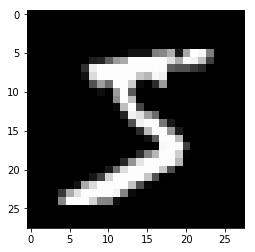

In [18]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [19]:
batch = next(iter(trainLoader))
len(batch)

2

In [20]:
type(batch)

list

In [21]:
images, labels = batch
images.shape

torch.Size([10, 1, 28, 28])

labels: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


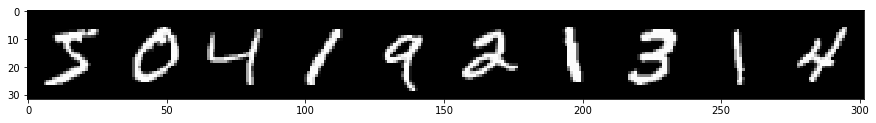

In [22]:
grid = torchvision.utils.make_grid(images, nrow = 10)

plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

# A simple CNN for MNIST:
Link: https://www.youtube.com/watch?v=8gZR4Q3262k

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math

from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
kwargs = {}
train_data = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                    transform=transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((.1307,),(.3081,))])),
batch_size=64, shuffle=True, **kwargs)
    
test_data = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, 
                    transform=transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((.1307,),(.3081,))])),
batch_size=64, shuffle=True, **kwargs)

In [42]:
sample = next(iter(train_data))
len(sample)

2

In [43]:
type(sample)

list

In [44]:
image, label = sample
image.shape

torch.Size([64, 1, 28, 28])

In [45]:
label.shape

torch.Size([64])

TypeError: Invalid dimensions for image data

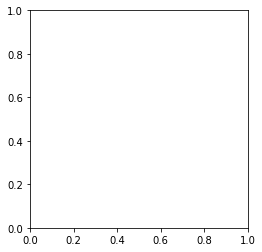

In [46]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [22]:
class Netz(nn.Module):
    def __init__(self):
        super(Netz, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv_dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 60)
        self.fc2 = nn.Linear(60, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.conv_dropout(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
        
    
model = Netz()
#model.cuda()



    

In [23]:
optimizer = optim.SGD(model.parameters(), lr=.1, momentum=.8)

def train(epoch):
    model.train()
    for batch_id, (data, target) in enumerate(train_data):
        #data = data.cuda()
        #target = target.cuda()
        data = Variable(data)
        target = Variable(target)
        optimizer.zero_grad()
        out = model(data)
        criterion = F.nll_loss
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_id * len(data), len(train_data.dataset),
                100. * batch_id / len(train_data), loss.item()))


for epoch in range(1, 5):
    train(epoch) 
    


C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1 [0/60000 (0%)]	Loss: 2.299713
Epoch: 1 [64/60000 (0%)]	Loss: 2.329349
Epoch: 1 [128/60000 (0%)]	Loss: 2.296638
Epoch: 1 [192/60000 (0%)]	Loss: 2.271286
Epoch: 1 [256/60000 (0%)]	Loss: 2.267780
Epoch: 1 [320/60000 (1%)]	Loss: 2.215930
Epoch: 1 [384/60000 (1%)]	Loss: 2.169978
Epoch: 1 [448/60000 (1%)]	Loss: 2.137015
Epoch: 1 [512/60000 (1%)]	Loss: 2.079986
Epoch: 1 [576/60000 (1%)]	Loss: 1.993636
Epoch: 1 [640/60000 (1%)]	Loss: 1.794752
Epoch: 1 [704/60000 (1%)]	Loss: 1.792264
Epoch: 1 [768/60000 (1%)]	Loss: 1.639566
Epoch: 1 [832/60000 (1%)]	Loss: 2.088159
Epoch: 1 [896/60000 (1%)]	Loss: 1.660005
Epoch: 1 [960/60000 (2%)]	Loss: 1.694710
Epoch: 1 [1024/60000 (2%)]	Loss: 1.963730
Epoch: 1 [1088/60000 (2%)]	Loss: 1.458147
Epoch: 1 [1152/60000 (2%)]	Loss: 1.225463
Epoch: 1 [1216/60000 (2%)]	Loss: 1.241306
Epoch: 1 [1280/60000 (2%)]	Loss: 1.296068
Epoch: 1 [1344/60000 (2%)]	Loss: 0.900720
Epoch: 1 [1408/60000 (2%)]	Loss: 1.431590
Epoch: 1 [1472/60000 (2%)]	Loss: 1.076899
Epoch: 1 [1

Epoch: 1 [24192/60000 (40%)]	Loss: 0.171307
Epoch: 1 [24256/60000 (40%)]	Loss: 0.314536
Epoch: 1 [24320/60000 (41%)]	Loss: 0.252894
Epoch: 1 [24384/60000 (41%)]	Loss: 0.137810
Epoch: 1 [24448/60000 (41%)]	Loss: 0.140456
Epoch: 1 [24512/60000 (41%)]	Loss: 0.324116
Epoch: 1 [24576/60000 (41%)]	Loss: 0.310713
Epoch: 1 [24640/60000 (41%)]	Loss: 0.252135
Epoch: 1 [24704/60000 (41%)]	Loss: 0.266336
Epoch: 1 [24768/60000 (41%)]	Loss: 0.338890
Epoch: 1 [24832/60000 (41%)]	Loss: 0.115237
Epoch: 1 [24896/60000 (41%)]	Loss: 0.164403
Epoch: 1 [24960/60000 (42%)]	Loss: 0.192744
Epoch: 1 [25024/60000 (42%)]	Loss: 0.131633
Epoch: 1 [25088/60000 (42%)]	Loss: 0.216325
Epoch: 1 [25152/60000 (42%)]	Loss: 0.330541
Epoch: 1 [25216/60000 (42%)]	Loss: 0.530742
Epoch: 1 [25280/60000 (42%)]	Loss: 0.194806
Epoch: 1 [25344/60000 (42%)]	Loss: 0.296640
Epoch: 1 [25408/60000 (42%)]	Loss: 0.413310
Epoch: 1 [25472/60000 (42%)]	Loss: 0.380054
Epoch: 1 [25536/60000 (43%)]	Loss: 0.395262
Epoch: 1 [25600/60000 (43%)]	Los

Epoch: 1 [48000/60000 (80%)]	Loss: 0.078737
Epoch: 1 [48064/60000 (80%)]	Loss: 0.406245
Epoch: 1 [48128/60000 (80%)]	Loss: 0.493443
Epoch: 1 [48192/60000 (80%)]	Loss: 0.100648
Epoch: 1 [48256/60000 (80%)]	Loss: 0.134044
Epoch: 1 [48320/60000 (80%)]	Loss: 0.400926
Epoch: 1 [48384/60000 (81%)]	Loss: 0.172229
Epoch: 1 [48448/60000 (81%)]	Loss: 0.173488
Epoch: 1 [48512/60000 (81%)]	Loss: 0.283292
Epoch: 1 [48576/60000 (81%)]	Loss: 0.282454
Epoch: 1 [48640/60000 (81%)]	Loss: 0.169033
Epoch: 1 [48704/60000 (81%)]	Loss: 0.072795
Epoch: 1 [48768/60000 (81%)]	Loss: 0.335624
Epoch: 1 [48832/60000 (81%)]	Loss: 0.460966
Epoch: 1 [48896/60000 (81%)]	Loss: 0.329318
Epoch: 1 [48960/60000 (82%)]	Loss: 0.093962
Epoch: 1 [49024/60000 (82%)]	Loss: 0.268372
Epoch: 1 [49088/60000 (82%)]	Loss: 0.470106
Epoch: 1 [49152/60000 (82%)]	Loss: 0.369754
Epoch: 1 [49216/60000 (82%)]	Loss: 0.107388
Epoch: 1 [49280/60000 (82%)]	Loss: 0.209376
Epoch: 1 [49344/60000 (82%)]	Loss: 0.214217
Epoch: 1 [49408/60000 (82%)]	Los

Epoch: 2 [12160/60000 (20%)]	Loss: 0.067734
Epoch: 2 [12224/60000 (20%)]	Loss: 0.183176
Epoch: 2 [12288/60000 (20%)]	Loss: 0.278019
Epoch: 2 [12352/60000 (21%)]	Loss: 0.196805
Epoch: 2 [12416/60000 (21%)]	Loss: 0.281614
Epoch: 2 [12480/60000 (21%)]	Loss: 0.081994
Epoch: 2 [12544/60000 (21%)]	Loss: 0.194494
Epoch: 2 [12608/60000 (21%)]	Loss: 0.163234
Epoch: 2 [12672/60000 (21%)]	Loss: 0.206075
Epoch: 2 [12736/60000 (21%)]	Loss: 0.145995
Epoch: 2 [12800/60000 (21%)]	Loss: 0.247433
Epoch: 2 [12864/60000 (21%)]	Loss: 0.545211
Epoch: 2 [12928/60000 (22%)]	Loss: 0.052335
Epoch: 2 [12992/60000 (22%)]	Loss: 0.113484
Epoch: 2 [13056/60000 (22%)]	Loss: 0.143638
Epoch: 2 [13120/60000 (22%)]	Loss: 0.315000
Epoch: 2 [13184/60000 (22%)]	Loss: 0.136898
Epoch: 2 [13248/60000 (22%)]	Loss: 0.256554
Epoch: 2 [13312/60000 (22%)]	Loss: 0.139565
Epoch: 2 [13376/60000 (22%)]	Loss: 0.288499
Epoch: 2 [13440/60000 (22%)]	Loss: 0.373948
Epoch: 2 [13504/60000 (22%)]	Loss: 0.149920
Epoch: 2 [13568/60000 (23%)]	Los

Epoch: 2 [35968/60000 (60%)]	Loss: 0.101257
Epoch: 2 [36032/60000 (60%)]	Loss: 0.114158
Epoch: 2 [36096/60000 (60%)]	Loss: 0.226482
Epoch: 2 [36160/60000 (60%)]	Loss: 0.330303
Epoch: 2 [36224/60000 (60%)]	Loss: 0.160938
Epoch: 2 [36288/60000 (60%)]	Loss: 0.168530
Epoch: 2 [36352/60000 (61%)]	Loss: 0.042410
Epoch: 2 [36416/60000 (61%)]	Loss: 0.200357
Epoch: 2 [36480/60000 (61%)]	Loss: 0.350501
Epoch: 2 [36544/60000 (61%)]	Loss: 0.182741
Epoch: 2 [36608/60000 (61%)]	Loss: 0.367868
Epoch: 2 [36672/60000 (61%)]	Loss: 0.069380
Epoch: 2 [36736/60000 (61%)]	Loss: 0.346114
Epoch: 2 [36800/60000 (61%)]	Loss: 0.271835
Epoch: 2 [36864/60000 (61%)]	Loss: 0.174386
Epoch: 2 [36928/60000 (62%)]	Loss: 0.095601
Epoch: 2 [36992/60000 (62%)]	Loss: 0.533880
Epoch: 2 [37056/60000 (62%)]	Loss: 0.180874
Epoch: 2 [37120/60000 (62%)]	Loss: 0.117640
Epoch: 2 [37184/60000 (62%)]	Loss: 0.196256
Epoch: 2 [37248/60000 (62%)]	Loss: 0.197697
Epoch: 2 [37312/60000 (62%)]	Loss: 0.039635
Epoch: 2 [37376/60000 (62%)]	Los

Epoch: 2 [59776/60000 (100%)]	Loss: 0.084367
Epoch: 2 [59840/60000 (100%)]	Loss: 0.084333
Epoch: 2 [59904/60000 (100%)]	Loss: 0.152466
Epoch: 2 [29984/60000 (100%)]	Loss: 0.085161
Epoch: 3 [0/60000 (0%)]	Loss: 0.269892
Epoch: 3 [64/60000 (0%)]	Loss: 0.149043
Epoch: 3 [128/60000 (0%)]	Loss: 0.053480
Epoch: 3 [192/60000 (0%)]	Loss: 0.027814
Epoch: 3 [256/60000 (0%)]	Loss: 0.180331
Epoch: 3 [320/60000 (1%)]	Loss: 0.156546
Epoch: 3 [384/60000 (1%)]	Loss: 0.168340
Epoch: 3 [448/60000 (1%)]	Loss: 0.037684
Epoch: 3 [512/60000 (1%)]	Loss: 0.220111
Epoch: 3 [576/60000 (1%)]	Loss: 0.204681
Epoch: 3 [640/60000 (1%)]	Loss: 0.289811
Epoch: 3 [704/60000 (1%)]	Loss: 0.174224
Epoch: 3 [768/60000 (1%)]	Loss: 0.212154
Epoch: 3 [832/60000 (1%)]	Loss: 0.311569
Epoch: 3 [896/60000 (1%)]	Loss: 0.324161
Epoch: 3 [960/60000 (2%)]	Loss: 0.147312
Epoch: 3 [1024/60000 (2%)]	Loss: 0.089466
Epoch: 3 [1088/60000 (2%)]	Loss: 0.071952
Epoch: 3 [1152/60000 (2%)]	Loss: 0.149862
Epoch: 3 [1216/60000 (2%)]	Loss: 0.812748

Epoch: 3 [23936/60000 (40%)]	Loss: 0.226965
Epoch: 3 [24000/60000 (40%)]	Loss: 0.053239
Epoch: 3 [24064/60000 (40%)]	Loss: 0.091574
Epoch: 3 [24128/60000 (40%)]	Loss: 0.413968
Epoch: 3 [24192/60000 (40%)]	Loss: 0.084758
Epoch: 3 [24256/60000 (40%)]	Loss: 0.219091
Epoch: 3 [24320/60000 (41%)]	Loss: 0.079472
Epoch: 3 [24384/60000 (41%)]	Loss: 0.151294
Epoch: 3 [24448/60000 (41%)]	Loss: 0.039944
Epoch: 3 [24512/60000 (41%)]	Loss: 0.189030
Epoch: 3 [24576/60000 (41%)]	Loss: 0.161855
Epoch: 3 [24640/60000 (41%)]	Loss: 0.297433
Epoch: 3 [24704/60000 (41%)]	Loss: 0.294990
Epoch: 3 [24768/60000 (41%)]	Loss: 0.191342
Epoch: 3 [24832/60000 (41%)]	Loss: 0.231280
Epoch: 3 [24896/60000 (41%)]	Loss: 0.097148
Epoch: 3 [24960/60000 (42%)]	Loss: 0.105309
Epoch: 3 [25024/60000 (42%)]	Loss: 0.069210
Epoch: 3 [25088/60000 (42%)]	Loss: 0.255518
Epoch: 3 [25152/60000 (42%)]	Loss: 0.252669
Epoch: 3 [25216/60000 (42%)]	Loss: 0.087697
Epoch: 3 [25280/60000 (42%)]	Loss: 0.079263
Epoch: 3 [25344/60000 (42%)]	Los

Epoch: 3 [47744/60000 (80%)]	Loss: 0.244243
Epoch: 3 [47808/60000 (80%)]	Loss: 0.146799
Epoch: 3 [47872/60000 (80%)]	Loss: 0.168378
Epoch: 3 [47936/60000 (80%)]	Loss: 0.122062
Epoch: 3 [48000/60000 (80%)]	Loss: 0.062985
Epoch: 3 [48064/60000 (80%)]	Loss: 0.168450
Epoch: 3 [48128/60000 (80%)]	Loss: 0.244492
Epoch: 3 [48192/60000 (80%)]	Loss: 0.219964
Epoch: 3 [48256/60000 (80%)]	Loss: 0.089533
Epoch: 3 [48320/60000 (80%)]	Loss: 0.146458
Epoch: 3 [48384/60000 (81%)]	Loss: 0.120179
Epoch: 3 [48448/60000 (81%)]	Loss: 0.188831
Epoch: 3 [48512/60000 (81%)]	Loss: 0.077411
Epoch: 3 [48576/60000 (81%)]	Loss: 0.181799
Epoch: 3 [48640/60000 (81%)]	Loss: 0.086141
Epoch: 3 [48704/60000 (81%)]	Loss: 0.099242
Epoch: 3 [48768/60000 (81%)]	Loss: 0.221013
Epoch: 3 [48832/60000 (81%)]	Loss: 0.087552
Epoch: 3 [48896/60000 (81%)]	Loss: 0.064967
Epoch: 3 [48960/60000 (82%)]	Loss: 0.184976
Epoch: 3 [49024/60000 (82%)]	Loss: 0.126697
Epoch: 3 [49088/60000 (82%)]	Loss: 0.267661
Epoch: 3 [49152/60000 (82%)]	Los

Epoch: 4 [11904/60000 (20%)]	Loss: 0.225770
Epoch: 4 [11968/60000 (20%)]	Loss: 0.167154
Epoch: 4 [12032/60000 (20%)]	Loss: 0.127889
Epoch: 4 [12096/60000 (20%)]	Loss: 0.314017
Epoch: 4 [12160/60000 (20%)]	Loss: 0.247406
Epoch: 4 [12224/60000 (20%)]	Loss: 0.082910
Epoch: 4 [12288/60000 (20%)]	Loss: 0.096321
Epoch: 4 [12352/60000 (21%)]	Loss: 0.051080
Epoch: 4 [12416/60000 (21%)]	Loss: 0.027720
Epoch: 4 [12480/60000 (21%)]	Loss: 0.355469
Epoch: 4 [12544/60000 (21%)]	Loss: 0.182143
Epoch: 4 [12608/60000 (21%)]	Loss: 0.242684
Epoch: 4 [12672/60000 (21%)]	Loss: 0.137284
Epoch: 4 [12736/60000 (21%)]	Loss: 0.231706
Epoch: 4 [12800/60000 (21%)]	Loss: 0.189510
Epoch: 4 [12864/60000 (21%)]	Loss: 0.288074
Epoch: 4 [12928/60000 (22%)]	Loss: 0.080740
Epoch: 4 [12992/60000 (22%)]	Loss: 0.115235
Epoch: 4 [13056/60000 (22%)]	Loss: 0.095096
Epoch: 4 [13120/60000 (22%)]	Loss: 0.222605
Epoch: 4 [13184/60000 (22%)]	Loss: 0.166414
Epoch: 4 [13248/60000 (22%)]	Loss: 0.233571
Epoch: 4 [13312/60000 (22%)]	Los

Epoch: 4 [35712/60000 (59%)]	Loss: 0.310604
Epoch: 4 [35776/60000 (60%)]	Loss: 0.058022
Epoch: 4 [35840/60000 (60%)]	Loss: 0.162840
Epoch: 4 [35904/60000 (60%)]	Loss: 0.070417
Epoch: 4 [35968/60000 (60%)]	Loss: 0.363165
Epoch: 4 [36032/60000 (60%)]	Loss: 0.114136
Epoch: 4 [36096/60000 (60%)]	Loss: 0.121520
Epoch: 4 [36160/60000 (60%)]	Loss: 0.324819
Epoch: 4 [36224/60000 (60%)]	Loss: 0.180006
Epoch: 4 [36288/60000 (60%)]	Loss: 0.199148
Epoch: 4 [36352/60000 (61%)]	Loss: 0.418527
Epoch: 4 [36416/60000 (61%)]	Loss: 0.393731
Epoch: 4 [36480/60000 (61%)]	Loss: 0.158931
Epoch: 4 [36544/60000 (61%)]	Loss: 0.147428
Epoch: 4 [36608/60000 (61%)]	Loss: 0.197705
Epoch: 4 [36672/60000 (61%)]	Loss: 0.245078
Epoch: 4 [36736/60000 (61%)]	Loss: 0.197554
Epoch: 4 [36800/60000 (61%)]	Loss: 0.140790
Epoch: 4 [36864/60000 (61%)]	Loss: 0.378248
Epoch: 4 [36928/60000 (62%)]	Loss: 0.200323
Epoch: 4 [36992/60000 (62%)]	Loss: 0.063197
Epoch: 4 [37056/60000 (62%)]	Loss: 0.148529
Epoch: 4 [37120/60000 (62%)]	Los

Epoch: 4 [59520/60000 (99%)]	Loss: 0.107795
Epoch: 4 [59584/60000 (99%)]	Loss: 0.101519
Epoch: 4 [59648/60000 (99%)]	Loss: 0.085667
Epoch: 4 [59712/60000 (99%)]	Loss: 0.238076
Epoch: 4 [59776/60000 (100%)]	Loss: 0.412185
Epoch: 4 [59840/60000 (100%)]	Loss: 0.119816
Epoch: 4 [59904/60000 (100%)]	Loss: 0.042919
Epoch: 4 [29984/60000 (100%)]	Loss: 0.057189


In [24]:
    def test():
        model.eval()
        loss = 0
        correct = 0
        for data, target in test_data:
            #data = Variable(data.cuda(), volatile=True)
            #target = Variable(target.cuda())
            out = model(data)
            loss += F.nll_loss(out, target, size_average=False).item()
            prediction = out.data.max(1, keepdim=True)[1]
            correct += prediction.eq(target.data.view_as(prediction)).cpu().sum()
        loss = loss / len(test_data.dataset)
        
        print('Test Loss: ', loss)
        print('Test Accuracy: ', 100.*correct.item()/len(test_data.dataset))       
   
    test()



C:\Users\laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\laptop\Anaconda3\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test Loss:  0.08581502581834793
Test Accuracy:  97.53


# ResNet implemenation

In [3]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes,
                     out_planes,
                     kernel_size=3,
                     stride=stride,
                     padding=1,
                     bias=False)

def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes,
                     out_planes,
                     kernel_size = 1,
                     stride = stride,
                     bias=False)

In [4]:
class BasicBlock(nn.Module):
    expansion = 1
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        
        
    def forward(self, x):
        residual = x # save x
        
        # conv -> bn -> relu
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
        
        # x + F(x) - this realizes the shortcut conn.
        out += residual
        out = self.relu(out) # final relu
        
        return out

In [5]:
class Bottleneck(nn.Module):
    """
    The expansion factor controls the number of output
    channels of the last 1x1 convolution layer.
    """
    expansion = 4
    
    def __init__(self, inplanes, planes, stride = 1, downsample=None):
        super(Bottleneck, self).__init__()
        
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes*self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        residual = x
    
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
            
        out += residual
        out = self.relu(out)
        
        return out
        

In [6]:
#from torchvision.models import resnet18

class ResNet(nn.Module):
    
    def __init__(self, block, layers, num_classes=10):
        self.inplanes = 10
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 2, stride = 1, padding = 0,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(10)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=1, padding=0)
        self.layer1 = self._make_layer(block, 10, layers[0])
        self.layer2 = self._make_layer(block, 20, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 40, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 80, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(3, stride=1)
        self.fc = nn.Linear(320 * block.expansion, num_classes)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        #print(x.size())
        #exit()
        x = x.view(x.size(0), -1)
        x = self.fc(x)      

        return x

In [7]:
kwargs = {}

def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model

# Run the ResNet Model (Error)

In [11]:
model = resnet18()

optimizer = optim.SGD(model.parameters(), lr=.1, momentum=.8)

def train(epoch):
    model.train()
    for batch_id, (data, target) in enumerate(train_data):
        #data = data.cuda()
        #target = target.cuda()
        data = Variable(data)
        target = Variable(target)
        optimizer.zero_grad()
        out = model(data)
        criterion = F.nll_loss
        loss = criterion(out, target)
        loss.backward()
        optimizer.step()
        print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_id * len(data), len(train_data.dataset),
                100. * batch_id / len(train_data), loss.item()))


for epoch in range(1, 3):
    train(epoch) 

RuntimeError: bool value of Tensor with more than one value is ambiguous

In [ ]:
    def test():
        model.eval()
        loss = 0
        correct = 0
        for data, target in test_data:
            #data = Variable(data.cuda(), volatile=True)
            #target = Variable(target.cuda())
            out = model(data)
            loss += F.nll_loss(out, target, size_average=False).item()
            prediction = out.data.max(1, keepdim=True)[1]
            correct += prediction.eq(target.data.view_as(prediction)).cpu().sum()
        loss = loss / len(test_data.dataset)
        
        print('Test Loss: ', loss)
        print('Test Accuracy: ', 100.*correct.item()/len(test_data.dataset))       
   
    test()

# Another test

In [12]:
#device = 'cuda'

model = resnet18()

opt = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

#simp_model.to(device)
model.train()

n_epochs = 10

for i in range(n_epochs):
    e_loss = 0
    
    for x,y in train_data:
        
        #x = x.to(device)
        #y = y.to(device)
        
        model.zero_grad()    # zero gradients
        out = model(x)       # forward pass
        loss = criterion(out, y)  # compute loss
        e_loss += loss.item()     # track loss (optional)
        loss.backward()           # compute gradients via backprop.
        opt.step()                # take an optimizer step

    print('Epoch {}: {:.4f}'.format(i, e_loss))



Epoch 0: 646.5353
Epoch 1: 110.2850
Epoch 2: 70.1289
Epoch 3: 52.8167
Epoch 4: 42.3248
Epoch 5: 34.6338
Epoch 6: 28.8396
Epoch 7: 23.7953
Epoch 8: 20.2603
Epoch 9: 17.8651


In [15]:
def evaluate(model, loader):
    model.eval()
    running_corrects = 0
    for x,y in loader:
        #x = x.to(device)
        #y = y.to(device)

        outputs = model(x)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == y.data)

    print("Accuracy: ", float(running_corrects)/len(test_data)*100.0)

In [16]:
evaluate(model, test_data)

Accuracy:  6304.458598726114
